# Efficient Frontier and Portfolio Optimization

### Portfolio of two assets

### $E(R_P)=\omega_1E(R_1) + \omega_2E(R_2),$

where $E(R_P)$ is the expected return of the portfolio,

$\omega_i$ is the weight of asset $i$,

$E(R_i)$ is the expected return of asset $i$.

#### Portfolio variance
$\sigma_P^2 = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + 2\omega_1\omega_2\sigma_{1,2}$,

$\sigma^2_P$ is the portfolio variance

$\sigma_{i}^2$ is the variance of assets i

$\sigma_{1,2}$ is the covariance between asset 1 and 2

$\omega_1+\omega_2=1$

Portfolio Volatility or standard deviation is
$\sigma_P = (\omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + 2\omega_1\omega_2\sigma_{1,2})^\frac{1}{2}$.

### Example

Two securities, say X and Y

$E(R_X)=5\%$ and $E(R_Y)=4\%$,

$\sigma_x^2=9\%, \sigma_Y^2=6\%$

$\sigma_{XY}=3\%.$

The following table presents the portfolio return and volatility for five different portfolio combinations

<img src="../Images/efficient_example.jpg">

### Portfolio of N assets

- Expected portfolio return $ E(R_P) = \omega^T \mu ,$
where $\omega^T=\{\omega_1,\omega_2,...,\omega_N\}, \mu = \{\mu_1 , \mu_2, \cdots ,\mu_N\}, \mu_i=E(R_i), i=1,2, \cdots ,N$ and



- Portfolio volatility as $\sigma_P=\sqrt{\omega^T\Sigma\omega},$
 where $ \Sigma = \begin{bmatrix} 
\sigma_1^2 & \cdots & \sigma_{1N}^2 \\
\cdots & \ddots & \cdots  \\
\sigma_{N1}^2 & \cdots & \sigma_N^2
\end{bmatrix}$ is the portfolio covariance matrix.



In [1]:
library(tseries)
options(repr.plot.width=6, repr.plot.height=4)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [3]:
Index_Value<-as.matrix(EuStockMarkets)
r<-diff(log(Index_Value))*100
no.of.portf<-10000

In [4]:
set.seed(1)

In [5]:
sigma<-mu<-rep(NA,no.of.portf)
for(i in 1:no.of.portf){
  w <- sample(1:1000,4,replace=T)
  w <- w/sum(w) ## weight for i-th portfolio
  rp <- r%*%w   ## returns of i-th portfolio
  mu[i] <- mean(rp)  ## mean return of i-th portfolio
  sigma[i] <- sd(rp) ## volatility of i-th portfolio
}

In [6]:
head(mu)

[1] 0.06055116 0.06226179 0.05492011 0.05219415 0.05303409 0.07132122

In [7]:
head(sigma)

[1] 0.8009170 0.8460349 0.8241745 0.8377033 0.8325218 0.8698285

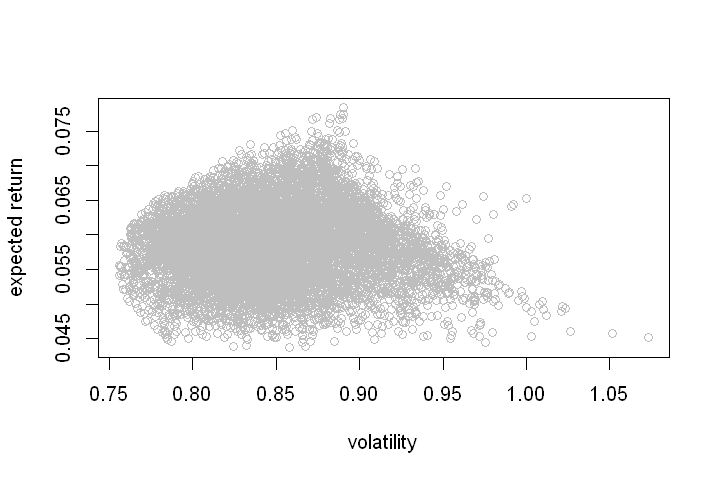

In [8]:
plot(sigma,mu,xlab = "volatility"
     ,ylab="expected return",col="grey")

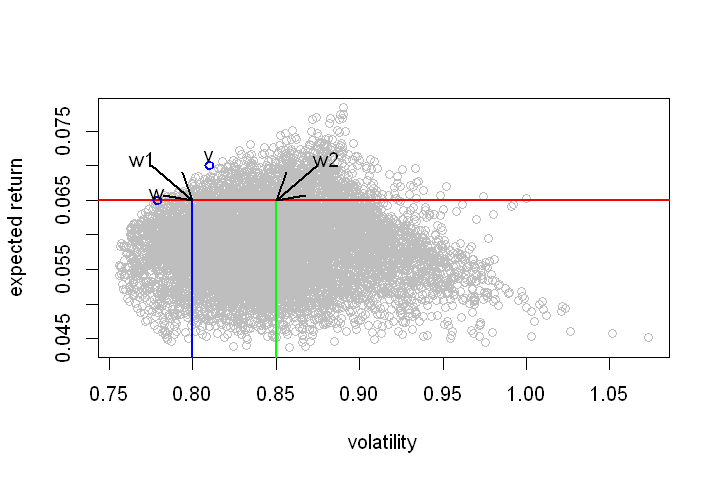

In [9]:
plot(sigma,mu,xlab = "volatility"
     ,ylab="expected return",col="grey")
abline(h=0.065,col="red",lwd=2)
segments(0.8,0.04,0.8,0.065,col="blue",lwd=2)
segments(0.85,0.04,0.85,0.065,col="green",lwd=2)
arrows(0.775,0.07,0.8,0.065,col="black",lwd=2)
arrows(0.875,0.07,0.85,0.065,col="black",lwd=2)
text(0.77,0.071,"w1")
text(0.88,0.071,"w2")
points(0.779,0.065,col="blue",lwd=2)
text(0.779,0.066,"w")
points(0.81,0.07,col="blue",lwd=2)
text(0.81,0.0715,"v")

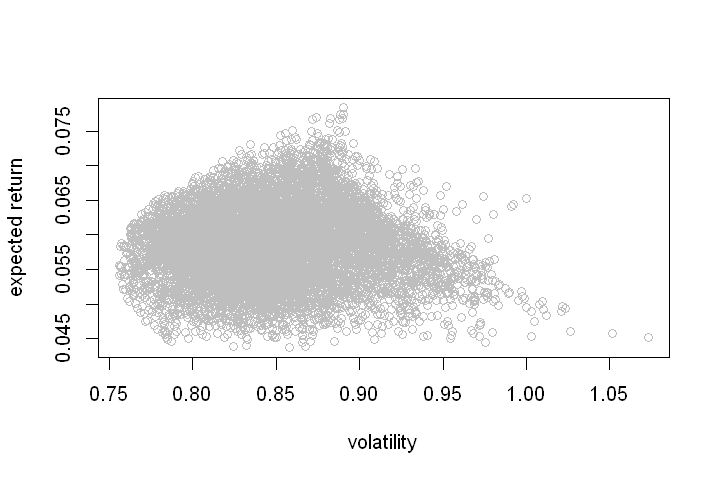

In [10]:
# plot(sigma,mu,xlab = "volatility"
#      ,ylab="expected return",col="grey")
# Sigma<-cov(r)
#  er<-seq(0.045,0.075,0.001)
# frontier<-matrix(NA,nrow=length(er),ncol=2)
# for(i in 1:length(er)){
#   port_optim<-portfolio.optim(r
#                 ,pm=er[i]
#                 ,covmat=Sigma)
#   frontier[i,]<-c(port_optim$ps,port_optim$pm)
# }
# lines(frontier,col="red") 

# Portfolio Optimization

Markowitz’s Portfolio Optimization (1952) minimizes the portfolio variance for a given level of expected return, i.e.,
$$\min_{\omega}\omega^T\Sigma\omega$$
such that
$$\omega^T\mu=\mu_0,$$
where $\mu_0$ is the expected level of return.

Note that you need to provide $\Sigma$. However, in reality we do not know what is true $\Sigma$. So we should estimate the $\Sigma$.

The popular estimator for $\Sigma$ is
$$ S=\frac{1}{n-1}\sum_{i=1}^n(r_i-\bar{r})(r_i-\bar{r})^T$$.

You can use other estimators (like Bayes estimator) of $\Sigma$. This will provide a different frontier. You can do it easily using portfolio.optim in tseries package.

 - Suppose you are considering the global portfolio with **passive investment strategy**, where you want to invest in the ETF of FTSE, DAX, SMI and CAC.

 - Your annualized expected return is $12.5\%$.

 - Consider annualized risk-free rate of return as $3\%$.

In [ ]:
Index_Value<-as.matrix(EuStockMarkets)

## log-return in percentage terms
r<-diff(log(Index_Value))*100

## expected return
expected_return <- 12.5/252

## portfolio covariance
Sigma<-cov(r)

In [ ]:
port_optim<-portfolio.optim(r
                ,pm=expected_return
                ,covmat=Sigma
                ,rf=3/252)

In [ ]:
weight<-port_optim$pw*100
names(weight)<-colnames(EuStockMarkets)
weight

#### expected return

In [ ]:
port_optim$pm

#### volatility at optimized weights

In [ ]:
port_optim$ps

### Plot the efficient frontier

In [ ]:
er<-seq(0.045,0.075,0.001)
frontier<-matrix(NA,nrow=length(er),ncol=2)
for(i in 1:length(er)){
  port_optim<-portfolio.optim(r
                ,pm=er[i]
                ,covmat=Sigma
                ,rf=3/252)
  frontier[i,]<-c(port_optim$ps,port_optim$pm)
}
plot(frontier,col="red",type = "l"
     ,xlab="volatility"
     ,ylab = "expected return")